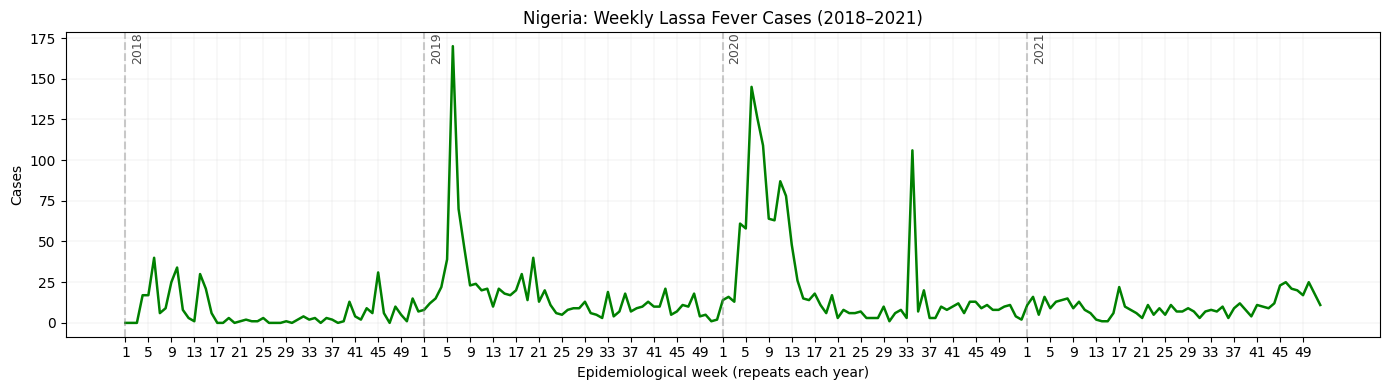

Saved: ../reports/figures/nigeria_weekly_cases.png


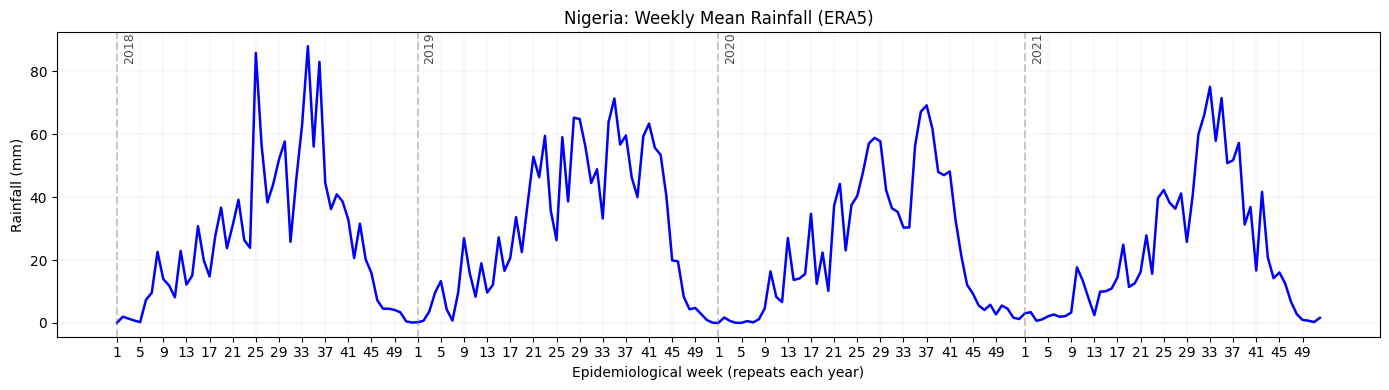

Saved: ../reports/figures/nigeria_weekly_rain.png


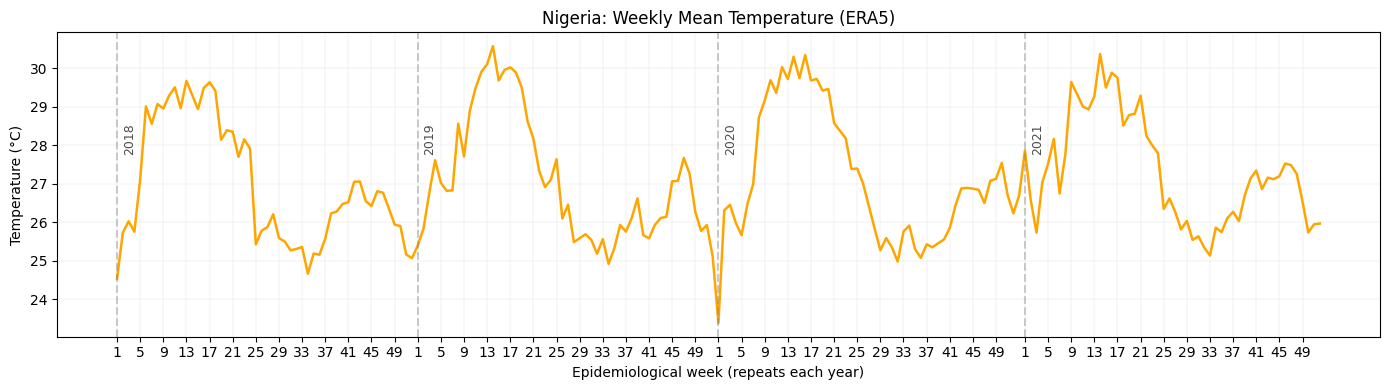

Saved: ../reports/figures/nigeria_weekly_temp.png


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

panel_path = "../data/processed/model/lassa_era5_weekly_panel_2018_2021.csv"
fig_dir = "../reports/figures"
os.makedirs(fig_dir, exist_ok=True)

df = pd.read_csv(panel_path)

# Aggregate nationally
nat = (
    df.groupby(["year", "week"], as_index=False)
      .agg(
          cases=("cases", "sum"),
          rain_mm=("rain_mm", "mean"),
          temp_c=("temp_c", "mean"),
      )
      .sort_values(["year", "week"])
      .reset_index(drop=True)
)

# Continuous time index
nat["t"] = range(len(nat))

# Year boundaries
year_starts = nat.groupby("year")["t"].min().to_dict()

# X-axis ticks: weeks 2,4,6,... within each year
tick_mask = nat["week"].isin(range(1, 53, 1))
xticks = nat.loc[tick_mask, "t"]
xtick_labels = nat.loc[tick_mask, "week"].astype(int)

# Thin ticks so it doesn’t overcrowd (≈ every 50 weeks)
xticks = xticks.iloc[::4]
xtick_labels = xtick_labels.iloc[::4]

def plot_with_year_breaks(x, y, color, title, ylabel, outname):
    plt.figure(figsize=(14, 4))
    plt.plot(x, y, color=color, linewidth=1.8)

    # Year demarcations
    for year, t0 in year_starts.items():
        plt.axvline(t0, linestyle="--", color="grey", alpha=0.4)
        plt.text(
            t0 + 1,
            plt.ylim()[1] * 0.9,
            str(year),
            rotation=90,
            fontsize=9,
            alpha=0.7,
        )

    plt.xticks(xticks, xtick_labels)
    plt.xlabel("Epidemiological week (repeats each year)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linewidth=0.3, alpha=0.4)

    outpath = os.path.join(fig_dir, outname)
    plt.tight_layout()
    plt.savefig(outpath, dpi=200)
    plt.show()

    print("Saved:", outpath)

# 1) Lassa cases — GREEN
plot_with_year_breaks(
    nat["t"],
    nat["cases"],
    color="green",
    title="Nigeria: Weekly Lassa Fever Cases (2018–2021)",
    ylabel="Cases",
    outname="nigeria_weekly_cases.png",
)

# 2) Rainfall — BLUE
plot_with_year_breaks(
    nat["t"],
    nat["rain_mm"],
    color="blue",
    title="Nigeria: Weekly Mean Rainfall (ERA5)",
    ylabel="Rainfall (mm)",
    outname="nigeria_weekly_rain.png",
)

# 3) Temperature — ORANGE
plot_with_year_breaks(
    nat["t"],
    nat["temp_c"],
    color="orange",
    title="Nigeria: Weekly Mean Temperature (ERA5)",
    ylabel="Temperature (°C)",
    outname="nigeria_weekly_temp.png",
)
